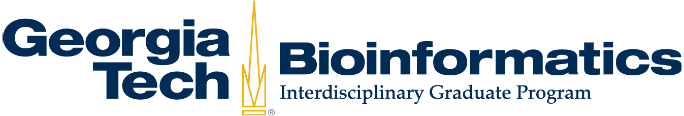

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>Shivam Sharma (shivamsharma13@gatech.edu), Nilavrah Sensarma (nsensarma3@gatech.edu), Bengy Gyimah-Asamoah, (bgyimaha3@gatech.edu)

</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 3 (Variant Calling) starter notebook (100 points)</h2>
    <h3>Deadline: 11:59PM, October 7th, 2024</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>Environment configuration</h3>
    <p><b>Node type: </b>Intel(R) Xeon(R) Gold 6226 CPU @ 2.70GHz<br>
    <b>Cores: </b>24 (12 cores per socket, 2 sockets)<br>
    <b>Memory: </b>754GB<br>
    <b>Storage: </b>50TB (network-mounted) and 1.4TB (local)<br>
    <b>Estimated time: </b>1 hour 30 Minutes <br></p>
</div>

---

# **1. Getting ready for variant calling**
### *Total Questions: 6*
### *Total Points: 5 + 10 + 5 + 20 + 5 + 20 = 65*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check your SAM file (you can also convert your SAM file to a BAM file and do the exercises on that)</h3>
    <p>1.1.1 We will start from where we left off in Project #2. We want to make sure that we are using the corrent SAM file.</p>
    <p>1.1.2 Show that your SAM file is sorted</p>
    
</div>

In [1]:
#Check you SAM file here.
!ls -lh

total 26G
-rw-r--r--. 1 imusayeva3 gtperson  48K Sep 28 09:04 Project3-VariantCalling.ipynb
-rw-r--r--. 1 imusayeva3 gtperson 2.6G Sep 28 09:08 SRR081224.bam
-rw-r--r--. 1 imusayeva3 gtperson  12G Sep 28 09:08 SRR081224.sam
-rw-r--r--. 1 imusayeva3 gtperson  12G Sep 28 09:07 SRR081224_sorted.sam


In [2]:
#Show that your SAM file is sorted by genomic coordinates.
!awk '$1 !~ /^@/ && $3 != "*"' SRR081224_sorted.sam | head -10 | awk '{print $4}'

10028
10064
10364
10396
10411
11951
12125
12155
12375
12404


In [4]:
#This was done in last project, but we want to check the sorted file again.
!awk '$1 !~ /^@/ && $3 != "*"' SRR081224_sorted.sam | head -20 | awk '{print $3, $4}'

chr1 10028
chr1 10064
chr1 10364
chr1 10396
chr1 10411
chr1 11951
chr1 12125
chr1 12155
chr1 12375
chr1 12404
chr1 12432
chr1 12441
chr1 12479
chr1 12481
chr1 12558
chr1 12582
chr1 12612
chr1 12650
chr1 12650
chr1 12656


<div class="alert alert-block alert-warning">
    <h3>1.2 Basic statistics of your SAM file</h3>
    <p>Get basic stats of your SAM/BAM file. Use SAMstats to see what summary information can you get from the tool. </p>
</div>

In [6]:
# See what SAMStats can give you.

#Get basic statistics
!samtools flagstat SRR081224.bam

44623032 + 0 in total (QC-passed reads + QC-failed reads)
44615438 + 0 primary
0 + 0 secondary
7594 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
44543725 + 0 mapped (99.82% : N/A)
44536131 + 0 primary mapped (99.82% : N/A)
44615438 + 0 paired in sequencing
22307719 + 0 read1
22307719 + 0 read2
44102794 + 0 properly paired (98.85% : N/A)
44474468 + 0 with itself and mate mapped
61663 + 0 singletons (0.14% : N/A)
273784 + 0 with mate mapped to a different chr
220026 + 0 with mate mapped to a different chr (mapQ>=5)


The results indicate that our reads are well-mapped and paired. The percentage of mapped reads is 99.82%, which shows that almost all reads have successfully aligned to the reference genome. Additionally, 98.85% of the reads are properly paired, meaning that both reads in each pair align as expected, reflecting a high-quality alignment. The rate of singleton reads is quite low at 0.14%, and only a small number of reads (273,784) have mates mapped to a different chromosome. Overall, these metrics suggest that the sequencing and alignment quality are very good, which is favorable for further downstream analysis.

<div class="alert alert-block alert-warning">
    <h3>1.3 The pieleup format</h3>
    <p><b>1.3.1</b> A lot of variant callers use the pielup format for calling variants from SAM file. Explain in 2-3 lines what is the pileup format?</p>
    <p><b>1.3.2</b> Explain the 6 columns of a pielup format file in your own words.</p>
</div>

#Information about the pileup format.

The pileup format is a text-based representation that provides detailed information about each genomic position based on aligned sequencing reads. It summarizes data such as the chromosome, position, reference base, number of reads covering the position, the aligned bases, and their respective quality scores. This format is extensively used for identifying variants like SNPs and indels by enabling visualization of how reads align to the reference genome at each position, thus providing an overview that is useful for variant calling and validation.

#Information about the 6 fields of the pieleup format file.
#Write one sentence for each file.

The six columns of a pileup format file include: 

(1) Chromosome: The identifier for the reference sequence (e.g., chr1); 

(2) Position: A 1-based coordinate that specifies the exact location within the chromosome; 

(3) Reference Base: The nucleotide present at the reference genome for that position; 

(4) Depth of Coverage: The number of reads covering that particular genomic position, indicating how well the region is sequenced; 

(5) Read Bases: This column includes the bases from all aligned reads at that position, using symbols such as dots (.) and commas (,) to represent matches on the forward and reverse strands, respectively; 

(6) Base Quality Scores (optional): The Phred quality scores of each aligned base in column five, encoded as ASCII characters. This provides information on the confidence level of each base alignment, which is essential for downstream analysis like variant calling.

The pileup format allows for efficient examination of read alignments and their quality, which is crucial for determining true variants from sequencing errors. 

<div class="alert alert-block alert-warning">
    <h3>1.4 Create the pileup file</h3>
    <p>Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals</p>
</div>

In [9]:
#First we need reference genome .fa file
#We downloaded the human reference genome fasta file from UCSC’s Golden Path using this link: http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz. 
#We then ran a wget to grab it and then used gunzip to decompress the file

#Download human reference genome (hg38) from golden path
!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/latest/hg38.fa.gz 
!gunzip hg38.fa.gz

#To see size and location of reference file
!ls -lh

--2024-09-28 10:21:21--  http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/latest/hg38.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1012013082 (965M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 965.13M  14.1MB/s    in 49s     

2024-09-28 10:22:10 (19.8 MB/s) - ‘hg38.fa.gz’ saved [1012013082/1012013082]

total 29G
-rw-r--r--. 1 imusayeva3 gtperson 3.2G Oct 27  2022 hg38.fa
-rw-r--r--. 1 imusayeva3 gtperson  54K Sep 28 10:21 Project3-VariantCalling.ipynb
-rw-r--r--. 1 imusayeva3 gtperson 2.6G Sep 28 09:08 SRR081224.bam
-rw-r--r--. 1 imusayeva3 gtperson  12G Sep 28 09:08 SRR081224.sam
-rw-r--r--. 1 imusayeva3 gtperson  12G Sep 28 09:07 SRR081224_sorted.sam


In [10]:
#Your command for pileup here.
!samtools mpileup -f hg38.fa SRR081224_sorted.sam > SRR081224.pileup

[mpileup] 1 samples in 1 input files


In [13]:
#Show the first 10 lines of the Pileup file.
!head -n 10 SRR081224.pileup

chr1	10064	c	1	^$.	A
chr1	10065	c	1	.	B
chr1	10066	c	1	.	E
chr1	10067	t	1	.	I
chr1	10068	a	1	.	I
chr1	10069	a	1	.	I
chr1	10070	c	1	.	G
chr1	10071	c	1	.	I
chr1	10072	c	1	.	H
chr1	10073	t	1	.	I


In [14]:
#Show the 10,000 - 10,010 lines of the Pileup file.
!sed -n '10000,10010p' SRR081224.pileup

chr1	36391	T	2	..	FH
chr1	36392	A	2	..	<H
chr1	36393	T	2	..	=H
chr1	36394	A	2	..	BH
chr1	36395	A	2	..	BH
chr1	36396	A	2	..	BH
chr1	36397	A	2	..	?H
chr1	36398	A	2	..	AD
chr1	36399	C	1	.	F
chr1	36400	T	2	..	CB
chr1	36401	T	2	..	GH


In [15]:
#Show the 200,000 - 200,010 lines of the Pileup file.
!sed -n '200000,200010p' SRR081224.pileup

chr1	1051675	G	8	......,^],	B4IIHGD@
chr1	1051676	C	8	......,,	24HBIBI>
chr1	1051677	C	7	.....,,	BIIFGBD
chr1	1051678	G	8	......,,	@;IIIGIA
chr1	1051679	G	8	......,,	@?GIIGH>
chr1	1051680	A	8	......,,	=.@GD>G>
chr1	1051681	T	8	......,,	@3GIDBD>
chr1	1051682	G	8	......,,	G>HIDBGB
chr1	1051683	G	8	..$....,,	3;FBHGGD
chr1	1051684	G	8	.....,,^].	DGIII>BE
chr1	1051685	C	8	.$....,,.	<FHD@DBI


<div class="alert alert-block alert-warning">
    <h3>1.5 Look more into the pileup file</h3>
    <p>Show the 100,000th entry in your pileup file and explain (2-4 lines) what information column 5 <b><i>Read Results</i></b> is providing the user</p>
</div>

In [16]:
#Show the 100,000th entry here.
!sed -n '100000p' SRR081224.pileup

chr1	712544	A	1	,	I


#Explain the entry here.

chr1: This is the chromosome identifier, indicating the genomic location. In this case, it represents chromosome 1.
   
   
712544: This is the position on chromosome 1, indicating the base pair coordinate being analyzed. The base in question is at position 712,544.


A: This is the reference nucleotide at this position, according to the reference genome. Here, the reference nucleotide is A.


1: This indicates the number of reads covering this position. In this case, there is 1 read covering this position.


,: This field represents the read base information, with each character representing the base read from the sequencing data. Here, the comma (,) signifies that the read matches the reference and the sequencing read is on the reverse strand. If it were a period (.), it would indicate a match on the forward strand.


I: This field represents the quality of the read, encoded in ASCII format. The quality score indicates the confidence in the read base.

For the character I, the ASCII value is 73.

The quality score in Phred format is:

Quality score
=
ASCII value
−
33
=
73
−
33
=
40
Quality score=ASCII value−33=73−33=40
So, the quality score for I is 40. This indicates a very high confidence in the accuracy of the read base.

<div class="alert alert-block alert-warning">
    <h3>1.6 Plot the read count distribution</h3>
    <p>A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
    <p>Plot a graph (thin bars or line) between <b><i>Read Count (y-axis)</i></b> and <b><i>Position (x-axis)</i></b> only for <u>chromosome 20</u>.</p>
    <hr>
    <p>You can use Python for visualization, but will have to filter the pileup file using bash or python.</p>
</div>

In [18]:
#An awk command can help you create a file with just the information for chr20.
!awk '$1 == "chr20"' SRR081224.pileup > chr20.pileup

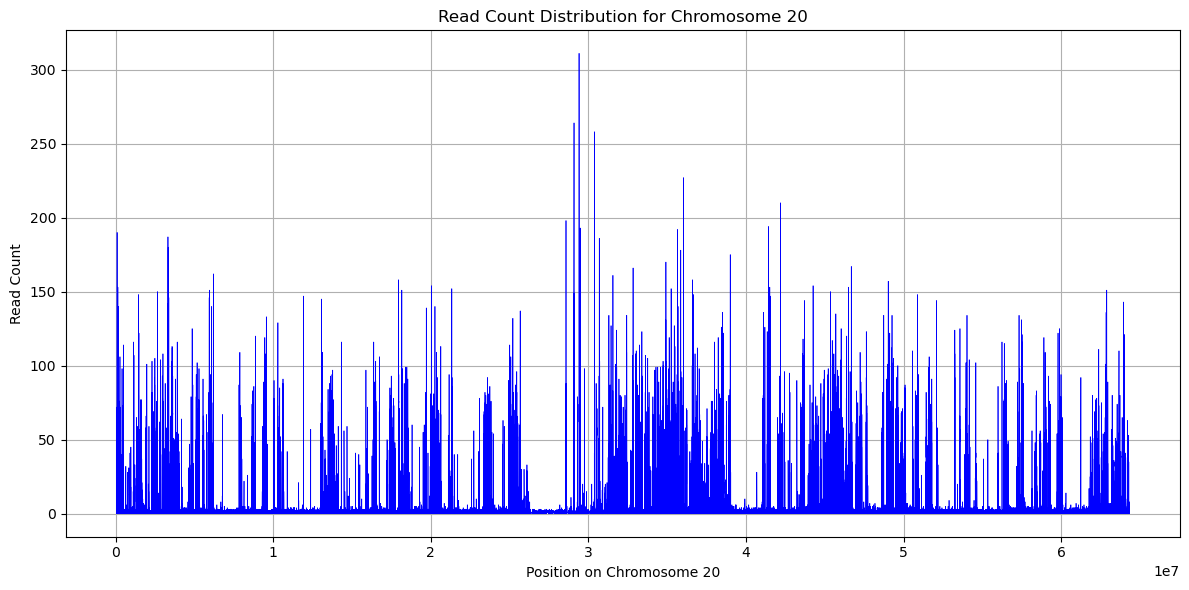

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from chr20.pileup
column_names = ['Chromosome', 'Position', 'Reference', 'Read_Count', 'Read_Bases', 'Base_Qualities']
chr20_data = pd.read_csv('chr20.pileup', sep='\t', header=None, names=column_names, usecols=['Position', 'Read_Count'])

# Plot the read count distribution for chromosome 20 
plt.figure(figsize=(12, 6))
plt.plot(chr20_data['Position'], chr20_data['Read_Count'], linestyle='-', linewidth=0.5, color='blue')
plt.xlabel('Position on Chromosome 20')
plt.ylabel('Read Count')
plt.title('Read Count Distribution for Chromosome 20')
plt.grid(True)
plt.tight_layout()
plt.show()

# **2. Variant calling**
### *Total Questions: 3*
### *Total Points: 10+5+2+10 = 27*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Call the variants (SNPs and Short Indels)</h3>
    <p><b>2.1.1</b> Write the command used and justify the flags you have used using one sentence.</p>
    <p><b>2.1.2</b> Informed decision.</p>
</div>

In [26]:
# Download VarScan 2.4.6 using wget from GitHub
!wget https://github.com/dkoboldt/varscan/raw/master/VarScan.v2.4.6.jar -O VarScan.v2.4.6.jar

--2024-09-28 11:11:28--  https://github.com/dkoboldt/varscan/raw/master/VarScan.v2.4.6.jar
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dkoboldt/varscan/master/VarScan.v2.4.6.jar [following]
--2024-09-28 11:11:28--  https://raw.githubusercontent.com/dkoboldt/varscan/master/VarScan.v2.4.6.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126611 (124K) [application/octet-stream]
Saving to: ‘VarScan.v2.4.6.jar’

VarScan.v2.4.6.jar  100%[===================>] 123.64K  --.-KB/s    in 0.04s   

2024-09-28 11:11:28 (2.69 MB/s) - ‘VarScan.v2.4.6.jar’ saved [126611/126611]



In [27]:
!java -jar VarScan.v2.4.6.jar

VarScan v2.4.6

***NON-COMMERCIAL VERSION***

USAGE: java -jar VarScan.jar [COMMAND] [OPTIONS] 

COMMANDS:
	pileup2snp		Identify SNPs from a pileup file
	pileup2indel		Identify indels a pileup file
	pileup2cns		Call consensus and variants from a pileup file
	mpileup2snp		Identify SNPs from an mpileup file
	mpileup2indel		Identify indels an mpileup file
	mpileup2cns		Call consensus and variants from an mpileup file

	somatic			Call germline/somatic variants from tumor-normal pileups
	mpileup2somatic		Call germline/somatic variants in multi-tumor-normal mpileup (beta feature in v2.4.5)
	copynumber		Determine relative tumor copy number from tumor-normal pileups
	readcounts		Obtain read counts for a list of variants from a pileup file

	filter			Filter SNPs by coverage, frequency, p-value, etc.
	somaticFilter		Filter somatic variants for clusters/indels
	fpfilter		Apply the false-positive filter

	processSomatic		Isolate Germline/LOH/Somatic calls from output
	copyCaller		GC-adjust and pro

In [34]:
#Use VarScan for calling variants. Look up the appropriate command for this. (for snps) and indels (I wrote sbatch code)

In [36]:
#Check files
!ls -lh

total 47G
-rw-r--r--. 1 imusayeva3 gtperson 392M Sep 28 10:58 chr20.pileup
-rw-r--r--. 1 imusayeva3 gtperson 3.2G Oct 27  2022 hg38.fa
-rw-r--r--. 1 imusayeva3 gtperson  31K Sep 28 10:24 hg38.fa.fai
-rw-r--r--. 1 imusayeva3 gtperson 256K Sep 28 12:46 indels.vcf
-rw-r--r--. 1 imusayeva3 gtperson 136K Sep 28 14:11 Project3-VariantCalling.ipynb
-rw-r--r--. 1 imusayeva3 gtperson 4.3M Sep 28 12:17 snps.vcf
-rw-r--r--. 1 imusayeva3 gtperson 2.6G Sep 28 09:08 SRR081224.bam
-rw-r--r--. 1 imusayeva3 gtperson  18G Sep 28 10:45 SRR081224.pileup
-rw-r--r--. 1 imusayeva3 gtperson  12G Sep 28 09:08 SRR081224.sam
-rw-r--r--. 1 imusayeva3 gtperson  12G Sep 28 09:07 SRR081224_sorted.sam
-rwxr-xr-x. 1 imusayeva3 gtperson 1.3K Sep 28 11:45 varscan.sbatch
-rw-r--r--. 1 imusayeva3 gtperson  777 Sep 28 12:46 varscan_snp_indel.err
-rw-r--r--. 1 imusayeva3 gtperson  651 Sep 28 12:46 varscan_snp_indel.log
-rw-r--r--. 1 imusayeva3 gtperson 124K Sep 28 11:11 VarScan.v2.4.6.jar


#Make an informed decision (based on section 1) about the parameters used for calling the variants.
#There is no specific answer to this, but the idea is to look into the flags used, and make sure they make sense.

For clinical variant calling, I chose conservative parameters to ensure reliability and accuracy, considering both germline and somatic variations. For SNPs, I set the minimum coverage to 25 and variant frequency to 30%, with an average base quality of 25, ensuring sufficient evidence and quality for each call. For indels, the minimum coverage was raised to 30 due to the higher detection challenge, with a variant frequency of 25% and a base quality threshold of 20. These settings aim to minimize false positives, which is crucial in a clinical context.

<div class="alert alert-block alert-warning">
    <h3>2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16</h3>
    <p><b>Q.</b> What is the average depth of bases for this variant called on chromosome 16</p>
</div>

In [44]:
#Extract this variant. There are multiple ways of doing this. Some fast and some easy.
#For snp.vcf, I extracted desired region
!awk '$1 == "chr16" && $2 >= 20800000 && $2 <= 30800000' snps.vcf > chr16_snp_variants.vcf

In [47]:
#Pick any random variant from chr16_snp_variants.vcf
!shuf -n 1 chr16_snp_variants.vcf

chr16	24191294	.	A	G	.	PASS	ADP=36;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:206:37:36:0:36:100%:2.2598E-21:0:38:0:0:8:28


Average depth of this variant is 36

In [46]:
#For indel.vcf, I extracted desired region
!awk '$1 == "chr16" && $2 >= 20800000 && $2 <= 30800000' indels.vcf > chr16_indel_variants.vcf

In [48]:
#Pick any random variant from chr16_indel_variants.vcf
!shuf -n 1 chr16_indel_variants.vcf

chr16	24907924	.	C	CAGGGA	.	PASS	ADP=32;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:144:32:32:3:29:90.62%:3.5714E-15:39:37:2:1:19:10


Average dpeth of this variant is 32

In [29]:
#There could be multiple variants in this range, please select one.

In [21]:
#The information is there in your VCF file.

<div class="alert alert-block alert-warning">
    <h3>2.3 How many indels do you have in your VCF file?</p>
</div>

In [23]:
#Same as above, there are multiple ways of doing this.

In [49]:
#Write your command and show the number of indels.
!grep -v "^#" indels.vcf | wc -l

1584


<div class="alert alert-block alert-warning">
    <h3>2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.</h3>
    <p><b>2.4.1</b> What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?</p>
    <p><b>2.4.2</b> How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?</p>
</div>

In [50]:
#Select the variant.
#For snp.vcf, I extracted desired region
!awk '$1 == "chr2" && $2 >= 203000000 && $2 <= 230000000' snps.vcf > chr2_snp_variants.vcf

In [51]:
#Pick any random variant from chr2_snp_variants.vcf
!shuf -n 1 chr2_snp_variants.vcf

chr2	206309592	.	T	C	.	PASS	ADP=32;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:59:32:32:16:16:50%:1.2304E-6:38:39:7:9:10:6


The variation observed at this position is 0/1, which indicates that the individual is heterozygous—one copy of the reference allele (T) and one copy of the alternate allele (C).

Number of Reference Alleles:
Since the genotype is 0/1, the individual carries one copy of the reference allele (T). The other allele is the alternate (C)

The read bases supporting the reference allele and alternate allele are given in the RDF, RDR, ADF, and ADR fields:

Reference Allele (RDF + RDR):
Forward (RDF): 7
Reverse (RDR): 9
Total Reference: 7 + 9 = 16
Alternate Allele (ADF + ADR):
Forward (ADF): 10
Reverse (ADR): 6
Total Alternate: 10 + 6 = 16
Thus, 16 reads supported the reference allele and 16 reads supported the alternate allele at this position.

In [52]:
#For indel.vcf, I extracted desired region
!awk '$1 == "chr2" && $2 >= 203000000 && $2 <= 230000000' indels.vcf > chr2_indel_variants.vcf

In [53]:
#Pick any random variant from chr2_indel_variants.vcf
!shuf -n 1 chr2_indel_variants.vcf

chr2	222044882	.	CT	C	.	PASS	ADP=35;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:62:35:35:18:17:48.57%:5.7598E-7:37:37:10:8:11:6


For the variant at chr2: 222,044,882:

Genotype (GT): 0/1
The individual is heterozygous, meaning they have one copy of the reference allele (CT) and one copy of the alternate allele (C).
2.4.2: Read Base Support
Reference Allele Support:
Forward (RDF): 10
Reverse (RDR): 8
Total Reference: 10 + 8 = 18
Alternate Allele Support:
Forward (ADF): 11
Reverse (ADR): 6
Total Alternate: 11 + 6 = 17
Thus, 18 reads supported the reference allele, and 17 reads supported the alternate allele.

In [26]:
#Variation observed and number of copies for reference allele.

In [27]:
#Number of reads supporting the ref & alt allele.

# **3. Filtering**
### *Total Questions: 1*
### *Total Points: 8 = 8*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Extract variants that have average per sample depth of > 50. </h3>
    <p>Show your command and number of variants before and after</p>
</div>

In [54]:
#Number of variants before filtering for snps.vcf
!grep -v "^#" snps.vcf | wc -l

27709


In [55]:
#Command for filtering for snps.vcf
!grep -v "^#" snps.vcf | awk -F'\t' '$8 ~ /ADP=[5-9][0-9]|ADP=[1-9][0-9][0-9]/' > snps_depth_gt_50.vcf

In [56]:
#Number of variants after filtering 
!wc -l snps_depth_gt_50.vcf

8564 snps_depth_gt_50.vcf


In [57]:
#Number of variants before filtering for indels.vcf
!grep -v "^#" indels.vcf | wc -l

1584


In [58]:
#Command for filtering for indels.vcf
!grep -v "^#" indels.vcf | awk -F'\t' '$8 ~ /ADP=[5-9][0-9]|ADP=[1-9][0-9][0-9]/' > indels_depth_gt_50.vcf

In [59]:
#Number of variants after filtering 
!wc -l indels_depth_gt_50.vcf

438 indels_depth_gt_50.vcf
